<a href="https://colab.research.google.com/github/urenajose/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Jose_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
mean_of_sales = (3505+2400+3027+2798+3700+3250+2689)/7
print(mean_of_sales)
variance_of_sales = ((3505-mean_of_sales)**2+ (2400-mean_of_sales)**2+ (3027-mean_of_sales)**2+ (2798-mean_of_sales)**2+ (3700-mean_of_sales)**2+ (3250-mean_of_sales)**2+ (2689-mean_of_sales)**2)/7
print(variance_of_sales)
std_of_sales = variance_of_sales**(1/2)
print(std_of_sales)

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
import pandas as pd
Store = pd.DataFrame({"customers_number":[127, 80, 105, 92, 120, 115, 93], "Sales":[3505, 2400, 3027, 2798, 3700, 3250, 2689]})
Store.head()
Store.cov()

,customers_number,Sales
customers_number,290.952381,7604.357143
Sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

Standard deviation of customers who entered the store last week

In [ ]:
import math
Mean_customers = (127+ 80+ 105+ 92+ 120+ 115+ 93)/7
print("Mean_customers",Mean_customers)
Variance_customers = ((127-Mean_customers)**2+ (80-Mean_customers)**2+ (105-Mean_customers)**2+ (92-Mean_customers)**2+ (120-Mean_customers)**2+ (115-Mean_customers)**2+ (93-Mean_customers)**2)/7
print("Variance", Variance_customers)
std_customers = math.sqrt(Variance_customers)
print("std",std_customers)
Variance_customers**(1/2) #another way to get the square root without importing math.
print("pd.std population",Store["customers_number"].std(ddof=0)) #ddof=0 to us population
print("pd.std sample",Store["customers_number"].std(ddof=1)) #pandas by default assumes sample poputlation

Mean_customers 104.57142857142857
Variance 249.3877551020408
std 15.792015549069118
pd.std population 15.792015549069118
pd.std sample 17.057326313123664


##"Pearson's Correlation" ![image.png](https://www.mathsisfun.com/data/images/correlation-formula.gif)

In [ ]:
#Step 1: Find the mean of x, and the mean of y
#Step 2: Subtract the mean of x from every x value, and subtract the mean of y from every y value
sales_a = [(3505-mean_of_sales), (2400-mean_of_sales), (3027-mean_of_sales), (2798-mean_of_sales), (3700-mean_of_sales), (3250-mean_of_sales), (2689-mean_of_sales)]
customers_b = [(127-Mean_customers), (80-Mean_customers), (105-Mean_customers), (92-Mean_customers), (120-Mean_customers), (115-Mean_customers), (93-Mean_customers)]
print(sales_a)
print(customers_b)


[452.2857142857142, -652.7142857142858, -25.71428571428578, -254.71428571428578, 647.2857142857142, 197.28571428571422, -363.7142857142858]
[22.42857142857143, -24.57142857142857, 0.4285714285714306, -12.57142857142857, 15.42857142857143, 10.42857142857143, -11.57142857142857]


In [ ]:
#Step 3: Calculate: ab, a2 and b2 for every value
ab_customers_sales = ((sales_a[0]*customers_b[0])+(sales_a[1]*customers_b[1])+(sales_a[2]*customers_b[2])+(sales_a[3]
                      *customers_b[3])+(sales_a[4]*customers_b[4])+(sales_a[5]*customers_b[5])+(sales_a[6]*customers_b[6]))#ab
print(ab_customers_sales)

45626.142857142855


In [ ]:
customers_b2 = ((127-Mean_customers)**2+ (80-Mean_customers)**2+ (105-Mean_customers)**2+ (92-Mean_customers)**2+ (120-Mean_customers)**2+ (115-Mean_customers)**2+ (93-Mean_customers)**2)
sales_a2 = ((3505-mean_of_sales)**2+ (2400-mean_of_sales)**2+ (3027-mean_of_sales)**2+ (2798-mean_of_sales)**2+ (3700-mean_of_sales)**2+ (3250-mean_of_sales)**2+ (2689-mean_of_sales)**2)
Rxy = ab_customers_sales/(sales_a2*customers_b2)**(1/2) #ab/sqrt(sum a2*sum b2) **(1/2) = math.sqrt()
print("correlation coefficient sales and customers =",  round(Rxy,2))
print("pandas correlation coefficient  sales and customers =",  Store["customers_number"].corr(Store["Sales"]))
print("\n pandas correlation sales and customers \n",  Store.corr())

correlation coefficient sales and customers = 0.96
pandas correlation coefficient  sales and customers = 0.9628339778148909

 pandas correlation sales and customers 
                   customers_number     Sales
customers_number          1.000000  0.962834
Sales                     0.962834  1.000000


In [ ]:
import numpy as np
Rxy_np = np.corrcoef(Store["customers_number"], Store["Sales"])
print(Rxy_np)
print("numpy correlation sales and customers =", Rxy_np[0,1])

[[1.         0.96283398]
 [0.96283398 1.        ]]
numpy correlation sales and customers = 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

In [ ]:
print(titanic.head(),"\n")

   Unnamed: 0  pclass  ...                        home.dest has_cabin_number
0           1     1.0  ...                     St Louis, MO                1
1           2     1.0  ...  Montreal, PQ / Chesterville, ON                1
2           3     1.0  ...  Montreal, PQ / Chesterville, ON                1
3           4     1.0  ...  Montreal, PQ / Chesterville, ON                1
4           5     1.0  ...  Montreal, PQ / Chesterville, ON                1

[5 rows x 16 columns] 



In [ ]:
print(titanic.cov())

                     Unnamed: 0      pclass  ...         body  has_cabin_number
Unnamed: 0        143117.500000  284.357034  ...   591.579132        -95.438885
pclass               284.357034    0.701969  ...    -2.876653         -0.249992
survived             -53.967125   -0.127248  ...     0.000000          0.061406
age                -1442.939812   -3.954605  ...    81.622922          1.463138
sibsp                 25.828746    0.053090  ...    -8.708471         -0.003946
parch                  1.172783    0.013287  ...     4.237190          0.013316
fare               -9410.735123  -24.227788  ...  -179.164684         10.976961
body                 591.579132   -2.876653  ...  9544.688567          3.625689
has_cabin_number     -95.438885   -0.249992  ...     3.625689          0.174613

[9 rows x 9 columns]


In [ ]:
print(titanic.var())

Unnamed: 0          143117.500000
pclass                   0.701969
survived                 0.236250
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
body                  9544.688567
has_cabin_number         0.174613
dtype: float64


In [ ]:
print(titanic.corr())

                  Unnamed: 0    pclass  ...      body  has_cabin_number
Unnamed: 0          1.000000  0.897822  ...  0.015558         -0.603727
pclass              0.897822  1.000000  ... -0.034642         -0.713857
survived           -0.293717 -0.312469  ...       NaN          0.302250
age                -0.296172 -0.366370  ...  0.059059          0.271887
sibsp               0.065594  0.060832  ... -0.099961         -0.009064
parch               0.003584  0.018322  ...  0.051099          0.036806
fare               -0.481215 -0.558629  ... -0.043110          0.507253
body                0.015558 -0.034642  ...  1.000000          0.083796
has_cabin_number   -0.603727 -0.713857  ...  0.083796          1.000000

[9 rows x 9 columns]


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
j = np.random.randn(3) #take a random vector
print("vector j",j)
o = np.random.randn(3)  # take a random vector
print(o)
o -= o.dot(j) * j  / np.linalg.norm(j)**2    # make it orthogonal to j
print("vector o",o)
#x /= np.linalg.norm(x)  # normalize it


#y = np.cross(k, x)      # cross product with k

print("j.o = ",np.dot(j,o))

vector j [ 2.26220023 -1.5510132   0.80460089]
[-0.13516476 -0.01047503 -0.73138467]
vector o [ 0.10792731 -0.17714419 -0.64492367]
j.o =  0.0


[[ 2.26220023 -1.5510132   0.80460089]
 [ 0.10792731 -0.17714419 -0.64492367]]


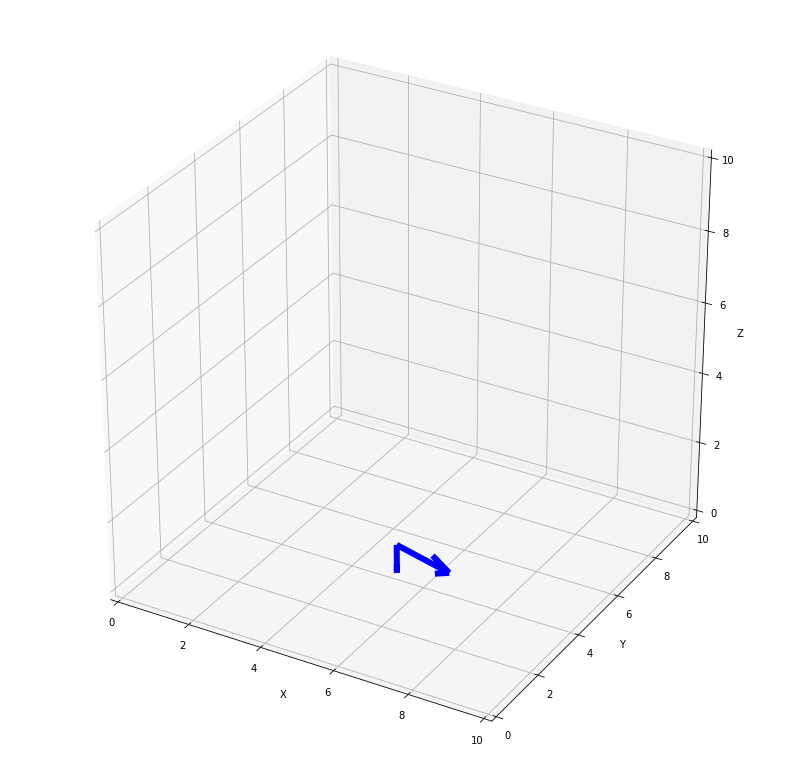

In [ ]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
cmap = 'hsv'
perpendicular = np.array([j,o])
U,V,W = zip(*perpendicular)
print(perpendicular)
ax.quiver(7,1,3,U,V,W, length=1, colors="Blue", linewidth=6)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
a = np.array([-5,3,7])
print(a)
b = np.array([6,-8,2])
print("\n",b)
print("Not Orthogonal, dot product is not equal to zero",np.dot(a,b))

[-5  3  7]

 [ 6 -8  2]
Not Orthogonal, dot product is not equal to zero -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
c = np.array([2,-15,6,20])
ct = np.array([[2,-15,6,20]])
print("\u2016c\u20162 is Norm square",np.linalg.norm(c)**2)
print("c dot c product", np.dot(c,c))
print(c)
print(c.T)
print(ct.T)
print("C transpose time C", (ct@c))

‖c‖2 is Norm square 665.0
c dot c product 665
[  2 -15   6  20]
[  2 -15   6  20]
[[  2]
 [-15]
 [  6]
 [ 20]]
C transpose time C [665]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
f = [4,12,11,9,2] #vector
f_norm = np.linalg.norm(f) #vector norm
print("\u2016f\u2016 =",f_norm)
f_hat = f/f_norm
print("f\u0302 =",f_hat)

‖f‖ = 19.131126469708992
f̂ = [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [ ]:
s = np.multiply(2,j)
print ("vector s",s)
e = np.multiply(4,o)
print ("vector e",e)
print("vector j",j)
print(np.linalg.norm(s))
print(np.linalg.norm(e))
print(np.linalg.norm(j))

vector s [ 4.52440046 -3.1020264   1.60920178]
vector e [ 0.43170923 -0.70857677 -2.57969469]
vector j [ 2.26220023 -1.5510132   0.80460089]
5.716843332495887
2.7098484421697897
2.8584216662479434


[[ 2.26220023 -1.5510132   0.80460089]
 [ 4.52440046 -3.1020264   1.60920178]
 [ 0.43170923 -0.70857677 -2.57969469]]


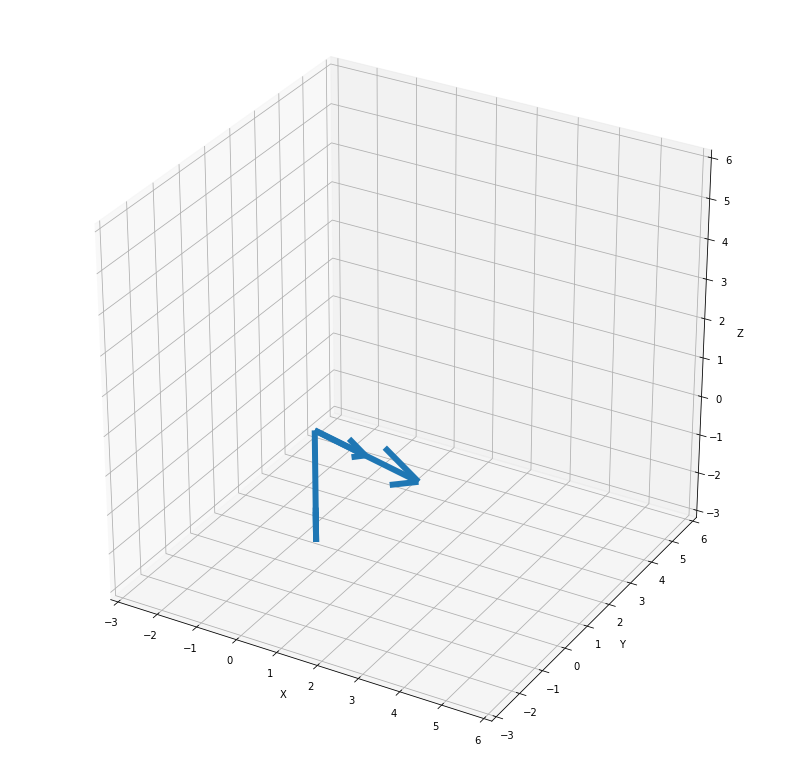

In [ ]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
perpendicular = np.array([j,s,e])
U,V,W = zip(*perpendicular)
colormap = cm.inferno
print(perpendicular)
ax.quiver(-3,5,-3,U,V,W , length=1, cmap='Reds', linewidth=6)
ax.set_xlim([-3, 6])
ax.set_ylim([-3, 6])
ax.set_zlim([-3, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
v1 = np.array([[1,3]])
v2 = np.array([[2,5]])
c1= 1
c2=4
v3= c1*v1+c2*v2
v3

array([[ 9, 23]])

In [ ]:
g = np.array([[1,2]])
h = np.array([[4,8]])
c1= 4
c2= 1
gh = c1*v1+c2*v2
gh

array([[ 6, 17]])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

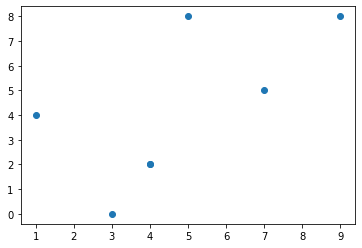

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()